In [69]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import math
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

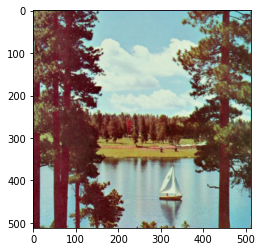

In [98]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [99]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    kernel_size = math.floor(len(kernel)/2)

    np.flip(kernel, 0)
    np.flip(kernel, 1)

    im_copy = im.copy()
    
    img_x = len(im)
    img_y = len(im[0])

    for j in range(kernel_size, img_y - kernel_size - 1):
        for i in range(kernel_size, img_x - kernel_size - 1):
            sum_0 = 0
            sum_1 = 0
            sum_2 = 0
            for x in range(-kernel_size, kernel_size+1):
                for y in range(-kernel_size, kernel_size+1):
                    sum_0 += im_copy[i + x, j + y, 0] * kernel[x+kernel_size, y+kernel_size]
                    sum_1 += im_copy[i + x, j + y, 1] * kernel[x+kernel_size, y+kernel_size]
                    sum_2 += im_copy[i + x, j + y, 2] * kernel[x+kernel_size, y+kernel_size]
            im[i, j, 0] = sum_0
            im[i, j, 1] = sum_1
            im[i, j, 2] = sum_2
    return im

In [100]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

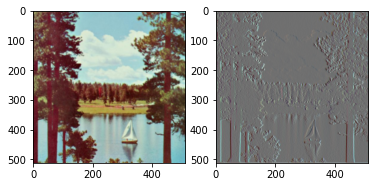

In [101]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()